# Unit 5 - Financial Planning


In [59]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [60]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [61]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [62]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [63]:
# Fetch current BTC price
#Ask Anthony how to use function from Tuesday class
btc_data = requests.get(btc_url)


btc_data_content = btc_data.json()

print(json.dumps(btc_data_content, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18521756,
            "total_supply": 18521756,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11729.35,
                    "volume_24h": 17913439101,
                    "market_cap": 217386489729,
                    "percentage_change_1h": -0.052357201648743,
                    "percentage_change_24h": 2.03651462761981,
                    "percentage_change_7d": 1.61278257811263,
                    "percent_change_1h": -0.052357201648743,
                    "percent_change_24h": 2.03651462761981,
                    "percent_change_7d": 1.61278257811263
                },
                "CAD": {
                    "price": 15471.01265,
                    "volume_24h": 23627826174.219,
                    

In [64]:
btc_price = btc_data_content["data"]["1"]["quotes"]["USD"]["price"]

In [65]:
# Fetch current ETH price
eth_data = requests.get(eth_url)

eth_data_content = eth_data.json()

print(json.dumps(eth_data_content, indent=4))

eth_price = eth_data_content["data"]["1027"]["quotes"]["USD"]["price"]


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113076622,
            "total_supply": 113076622,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 378.88,
                    "volume_24h": 8852300786,
                    "market_cap": 42918997199,
                    "percentage_change_1h": -0.0686607909536972,
                    "percentage_change_24h": 0.0465199835357186,
                    "percentage_change_7d": -2.16328726548473,
                    "percent_change_1h": -0.0686607909536972,
                    "percent_change_24h": 0.0465199835357186,
                    "percent_change_7d": -2.16328726548473
                },
                "CAD": {
                    "price": 499.74272,
                    "volume_24h": 11676184736.734,
               

In [66]:
# Compute current value of my crpto

my_btc_value = my_btc*btc_price
my_eth_value = my_eth* eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14075.22
The current value of your 5.3 ETH is $2008.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [67]:
# Current amount of shares
my_agg = 200
my_spy = 50


In [68]:
# Set Alpaca API key and secret
alp_key = os.getenv("ALPACA_API_KEY")
alp_sec_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alp_key, alp_sec_key, api_version = "v2")

In [69]:
# Format current date as ISO format
start = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat
end = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "day"

# Get current closing prices for SPY and AGG
current_data = alpaca_api.get_barset(tickers, timeframe, start=start, end=end).df

# Preview DataFrame
current_data

AGG                                         \
                             open      high       low    close    volume   
2020-05-29 00:00:00-04:00  117.43  117.7100  117.3200  117.670  16292692   
2020-06-01 00:00:00-04:00  117.35  117.3999  117.2400  117.365  10635820   
2020-06-02 00:00:00-04:00  117.38  117.4700  117.3100  117.450   7837090   
2020-06-03 00:00:00-04:00  117.26  117.4100  117.0600  117.160  11554888   
2020-06-04 00:00:00-04:00  117.27  117.3000  116.8200  116.860   9562346   
...                           ...       ...       ...      ...       ...   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010   3250338   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.040   3295967   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.9600  117.970   4988612   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.8800  117.880   3589312   
2020-10-19 00:00:00-04:00  117.81  117.8600  117.7200  117.787   3895071   

                              SPY                                         
                             open      high     low     close     volume  
2020-05-29 00:00:00-04:00  302.46  304.9600  299.47  304.1600  101356845  
2020-06-01 00:00:00-04:00  303.62  306.2050  303.06  305.5800   46186733  
2020-06-02 00:00:00-04:00  306.55  308.1300  305.10  308.1300   66042497  
2020-06-03 00:00:00-04:00  310.24  313.2200  309.94  312.2117   79223813  
2020-06-04 00:00:00-04:00  311.11  313.0000  309.08  311.3100   68304792  
...                           ...       ...     ...       ...        ...  
2020-10-13 00:00:00-04:00  352.28  352.4651  349.09  350.1500   62272512  
2020-10-14 00:00:00-04:00  350.75  351.9300  347.14  347.9700   47281475  
2020-10-15 00:00:00-04:00  343.71  348.0200  343.13  347.5100   50665477  
2020-10-16 00:00:00-04:00  348.96  350.7500  347.10  347.2500   62467863  
2020-10-19 00:00:00-04:00  348.62  349.3300  341.04  342.0200   51690440  

[100 rows x 10 columns]

In [70]:
# Pick AGG and SPY close prices
agg_close_price = current_data.iloc[-1, 3]
spy_close_price = current_data.iloc[-1, 8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [71]:
# Compute the current value of shares
my_agg_value = agg_close_price*my_agg
my_spy_value = spy_close_price*my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40


### Savings Health Analysis

In [72]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame 
#Ask Anthony

crypto=my_btc_value+my_eth_value
shares=my_spy_value+ my_agg_value

allocation_data={"Asset Class":["crypto", "shares"], "Amount":[crypto, shares]}

df_savings = pd.DataFrame(allocation_data, columns=["Asset Class","Amount"]).set_index("Asset Class")

# Display savings DataFrame
display(df_savings)

,Amount
Asset Class,
crypto,16083.284
shares,40658.400


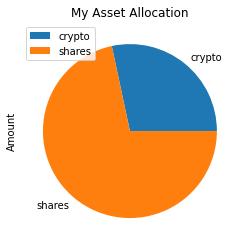

In [73]:
# Plot savings pie chart



df_savings.plot.pie(y="Amount", title= "My Asset Allocation")

In [74]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_spy_value +my_agg_value+my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
else:
    print("You have to save more money!!")


Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [75]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG
df_etf_data = alpaca_api.get_barset(tickers, "1D", start=start_date, end= end_date).df

# Display sample data
df_etf_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0  202.83   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0  202.98   

                                                                
                             high       low   close     volume  
2015-10-16 00:00:00-04:00  203.29  201.9200  203.14   79323870  
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations 
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_portfolio = MCSimulation(
    portfolio_data = df_etf_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)

In [78]:
# Printing the simulation input data
print(MC_portfolio)

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998943,1.009754,0.994391,1.000660,1.018454,0.996441,1.008946,1.005444,1.003450,0.988041,...,1.006888,1.009352,1.004177,1.008788,0.999344,1.012924,0.997770,1.004374,1.003279,1.001410
2,1.004509,1.005339,1.004770,1.004749,1.018033,0.998514,1.006259,1.006644,1.006011,0.981100,...,1.013988,1.015315,1.010421,1.011635,0.996657,1.008743,1.003095,1.021247,0.988568,1.012674
3,0.999147,0.999753,1.004805,0.999895,1.016225,1.008080,1.010599,1.004141,1.001008,0.976395,...,1.025375,1.013802,1.013100,1.020636,1.005265,1.004119,1.000008,1.006317,0.990873,1.013870
4,1.004666,0.989847,1.013502,0.995045,1.017320,1.008883,1.018176,1.003422,1.005181,0.960612,...,1.015932,1.021380,1.010416,1.025970,1.003996,1.000462,0.988583,0.994455,0.988258,1.012634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.001493,4.218753,3.954077,19.358947,3.228298,9.302423,18.379621,11.898966,14.489055,3.646419,...,15.578035,20.212017,9.398552,7.600017,27.397111,3.722614,2.180381,7.712390,12.031410,25.314694
7557,19.962466,4.213991,3.985511,19.156413,3.228671,9.263672,18.276597,11.939545,14.406312,3.637699,...,15.621022,20.425926,9.337358,7.569112,27.059781,3.736768,2.185307,7.657315,11.970458,25.209312
7558,20.021920,4.137631,4.012378,19.251808,3.229766,9.427269,18.393554,11.968547,14.479469,3.656427,...,15.567554,20.573849,9.254225,7.627563,26.908535,3.718000,2.180032,7.603533,11.984715,25.040049
7559,20.097754,4.097301,4.071587,19.446715,3.231272,9.460524,18.508601,11.945652,14.647338,3.646920,...,15.813441,20.378978,9.209174,7.664840,26.859596,3.735207,2.203907,7.650896,11.867208,25.015903


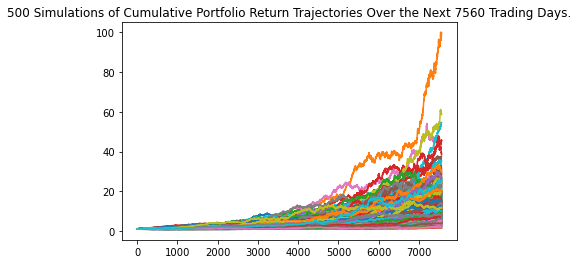

In [80]:
# Plot simulation outcomes

line_plot_portfolio = MC_portfolio.plot_simulation()


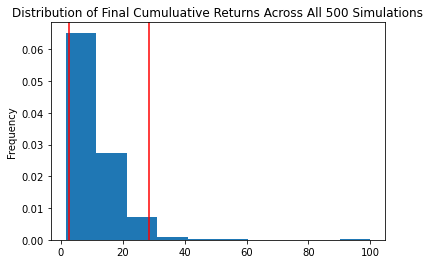

In [91]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()


### Retirement Analysis

In [92]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean             11.123324
std               8.393905
min               1.531580
25%               5.886621
50%               9.100439
75%              13.929204
max              99.936303
95% CI Lower      2.593791
95% CI Upper     28.330384
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [93]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * summary[8],2)
ci_upper = round(initial_investment * summary[9],2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51875.83 and $566607.68


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [110]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * summary[8],2)
ci_upper = round(initial_investment * summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $77813.74 and $849911.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [95]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5 = MCSimulation(
    portfolio_data = df_etf_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5)

In [96]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_portfolio_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994876,0.999914,1.000725,1.000031,1.001024,0.991355,1.007177,0.993165,0.993074,1.003635,...,1.014307,1.001117,1.007663,1.005947,1.005755,0.999300,0.999406,1.003975,1.001309,0.995781
2,1.001075,0.990481,0.996363,0.995019,0.992983,0.984681,1.010974,0.990035,0.984253,1.006928,...,1.020726,0.997331,1.008767,1.012658,1.006476,1.008360,0.998904,0.999248,0.992234,1.007161
3,0.994882,0.977319,0.987603,0.980881,0.989179,0.982623,1.020125,1.006068,0.970501,1.005877,...,1.021228,0.980415,0.996576,1.007343,1.017104,1.020818,1.003924,1.012175,0.992069,1.008785
4,0.985132,0.978693,0.985010,0.985469,0.995649,0.990208,1.025288,1.008999,0.974344,1.013670,...,1.017495,0.986951,0.999392,0.998426,1.021226,1.019180,1.005664,1.011828,0.996306,1.015726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.274836,1.133691,0.869173,1.155152,1.078543,1.270151,1.614476,2.205970,1.261046,1.347656,...,1.260296,1.910258,1.355137,1.552744,1.287236,2.636700,1.389219,1.450002,1.199701,1.361028
1257,1.292083,1.153826,0.871271,1.158098,1.082389,1.261295,1.618199,2.195742,1.272286,1.349572,...,1.263115,1.929394,1.361615,1.554782,1.297798,2.653618,1.376187,1.457682,1.197182,1.349347
1258,1.291101,1.143729,0.865540,1.151054,1.081216,1.260050,1.611424,2.201197,1.283314,1.334188,...,1.251265,1.936671,1.375269,1.547889,1.295917,2.664133,1.388405,1.464001,1.206324,1.373168
1259,1.289475,1.135188,0.866512,1.160382,1.091006,1.256073,1.614023,2.216050,1.290521,1.340952,...,1.255798,1.939350,1.388211,1.557051,1.297507,2.674889,1.373646,1.482260,1.196464,1.373725


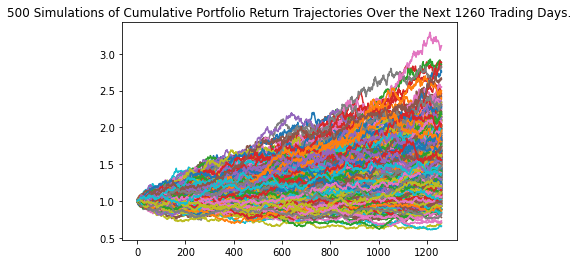

In [97]:
# Plot simulation outcomes
line_plot_portfolio_5 = MC_portfolio_5.plot_simulation()

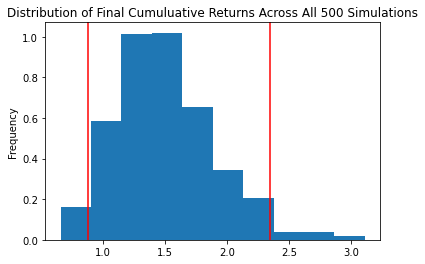

In [98]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_portfolio_5.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_portfolio_5.summarize_cumulative_return()

# Print summary statistics
print(summary_5)

count           500.000000
mean              1.500910
std               0.398526
min               0.658350
25%               1.215366
50%               1.455176
75%               1.738433
max               3.109249
95% CI Lower      0.877668
95% CI Upper      2.343238
Name: 1260, dtype: float64


In [103]:
# Set initial investment
initial_5 = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_5*summary_5[8]
ci_upper_five = initial_5*summary_5[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $87766.7905139901 and $234323.84420130833


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10 = MCSimulation(
    portfolio_data = df_etf_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10)

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005670,0.996626,0.992319,1.009102,1.011920,1.014474,0.986758,0.998936,1.003119,1.008891,...,0.989419,1.000394,0.991756,0.985048,0.994103,0.982897,1.009814,0.996301,0.996086,1.003936
2,1.001932,1.005078,0.981269,1.004912,1.011269,1.023544,0.986061,0.987197,1.017079,1.014470,...,0.995329,0.995348,0.982379,0.979295,0.984780,0.991376,0.995818,1.000553,0.993143,0.992163
3,1.006869,1.011767,0.973431,1.019253,1.008759,1.023269,0.979005,0.978918,1.011491,1.010115,...,0.993425,0.992239,0.987668,0.970363,0.987833,0.998956,0.988864,0.992657,0.997035,0.998858
4,0.995967,1.001048,0.973670,1.017557,1.016790,1.029944,0.995621,0.964439,1.013385,1.016058,...,0.991321,0.979660,0.984992,0.973026,0.987509,0.991093,0.977680,0.989530,1.000031,0.986791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.145506,1.997898,2.648966,3.309387,1.859974,2.259330,0.943650,1.801914,1.782038,2.120895,...,2.839718,2.238653,0.979625,2.426462,1.274718,1.982882,2.048227,2.702718,2.682407,2.203122
2517,2.120259,1.995157,2.675269,3.323889,1.861699,2.255855,0.953724,1.817499,1.803039,2.113916,...,2.845323,2.231160,0.978326,2.437643,1.283471,1.971514,2.073169,2.712831,2.686950,2.212549
2518,2.114862,1.988252,2.682009,3.295588,1.845071,2.252395,0.942769,1.827379,1.818798,2.101982,...,2.821326,2.206796,0.964310,2.418563,1.272944,1.963902,2.071887,2.686139,2.672085,2.204705
2519,2.105817,1.968935,2.692196,3.308242,1.829721,2.243497,0.943707,1.828518,1.812364,2.086332,...,2.830162,2.198389,0.959437,2.401346,1.280618,1.978215,2.077670,2.704148,2.657017,2.189128


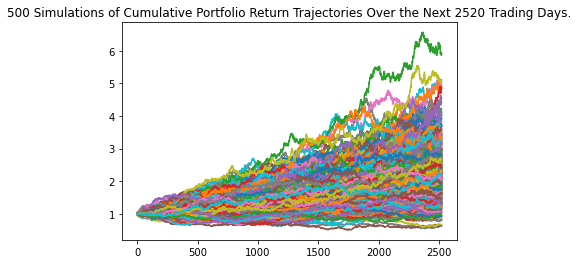

In [106]:
# Plot simulation outcomes
line_plot_portfolio_10 = MC_portfolio_10.plot_simulation()

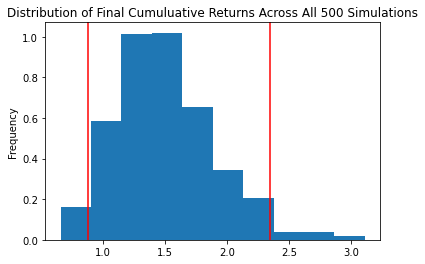

In [107]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_portfolio_5.plot_distribution()

In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10=MC_portfolio_10.summarize_cumulative_return()

# Print summary statistics
print(summary_10)

count           500.000000
mean              2.226285
std               0.806431
min               0.634800
25%               1.643338
50%               2.111249
75%               2.681708
max               5.926452
95% CI Lower      0.997990
95% CI Upper      4.075358
Name: 2520, dtype: float64


In [111]:
# Set initial investment
initial_investment_10 =60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=initial_investment_10*summary_10[8]
ci_upper_ten=initial_investment_10*summary_10[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59879.39 and $244521.51
